# 🛍️ EDA: Product Recommendation Clustering

Welcome to the 21-step Exploratory Data Analysis (EDA) notebook for the **Product Recommendation Clustering** scenario.  
We explore high-dimensional user behavior to uncover meaningful customer segments for recommendation systems.

---

📁 **Dataset:** `EDA_ProductRecommendationClustering_Dataset.csv`  
🧠 **Goal:** Discover customer groups via clustering techniques  
📊 **Approach:** PCA, KMeans, Feature Engineering  


## 📥 Step 1: Load Dataset

In [1]:

import pandas as pd
df = pd.read_csv("EDA_ProductRecommendationClustering_Dataset.csv")
df.head()


,user_id,num_product_views,avg_view_time,click_through_rate,avg_cart_value,purchase_frequency,num_categories_browsed,used_discount,membership_status,device_type,referral_channel,days_since_last_login
0,USER00000,18,54.01,0.23,103.57,1.25,3,1,Silver,Mobile,Email,37
1,USER00001,10,34.41,0.23,93.50,1.23,5,1,Gold,Mobile,Direct,50
2,USER00002,16,30.05,0.41,80.26,0.96,7,1,Free,Mobile,Email,12
3,USER00003,19,56.21,0.12,50.54,3.24,4,1,Silver,Desktop,Direct,40
4,USER00004,11,10.39,0.29,112.23,0.19,5,0,Free,Mobile,Ads,39


## 🧾 Step 2: Dataset Overview

In [2]:

print("Shape:", df.shape)
df.info()
df.describe(include='all').T


Shape: (10000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 10000 non-null  object 
 1   num_product_views       10000 non-null  int64  
 2   avg_view_time           10000 non-null  float64
 3   click_through_rate      10000 non-null  float64
 4   avg_cart_value          10000 non-null  float64
 5   purchase_frequency      10000 non-null  float64
 6   num_categories_browsed  10000 non-null  int64  
 7   used_discount           10000 non-null  int64  
 8   membership_status       10000 non-null  object 
 9   device_type             10000 non-null  object 
 10  referral_channel        10000 non-null  object 
 11  days_since_last_login   10000 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 937.6+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,10000,10000,USER00000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_product_views,10000.0,NaN,NaN,NaN,15.0073,3.867136,3.0,12.0,15.0,17.0,30.0
avg_view_time,10000.0,NaN,NaN,NaN,44.735054,19.811203,-28.1,31.0,44.875,58.26,118.83
click_through_rate,10000.0,NaN,NaN,NaN,0.283625,0.158998,0.0,0.16,0.26,0.39,0.86
avg_cart_value,10000.0,NaN,NaN,NaN,75.013534,30.128907,-37.14,54.69,75.19,95.52,198.01
purchase_frequency,10000.0,NaN,NaN,NaN,1.482123,1.468427,0.0,0.43,1.04,2.05,13.34
num_categories_browsed,10000.0,NaN,NaN,NaN,4.0231,2.001791,0.0,3.0,4.0,5.0,13.0
used_discount,10000.0,NaN,NaN,NaN,0.399,0.489717,0.0,0.0,0.0,1.0,1.0
membership_status,10000,4,Free,5007,NaN,NaN,NaN,NaN,NaN,NaN,NaN
device_type,10000,3,Mobile,6060,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 📊 Step 3: Univariate Analysis

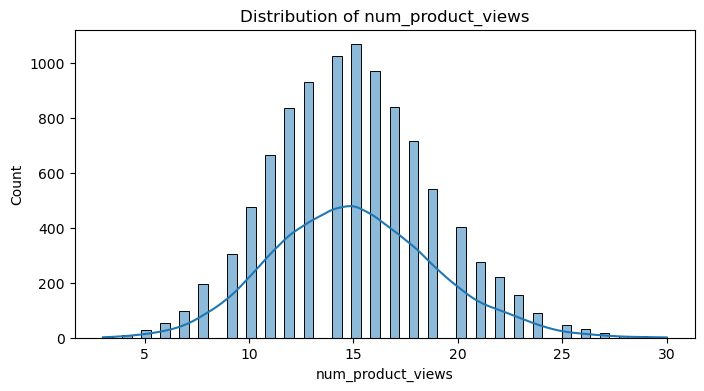

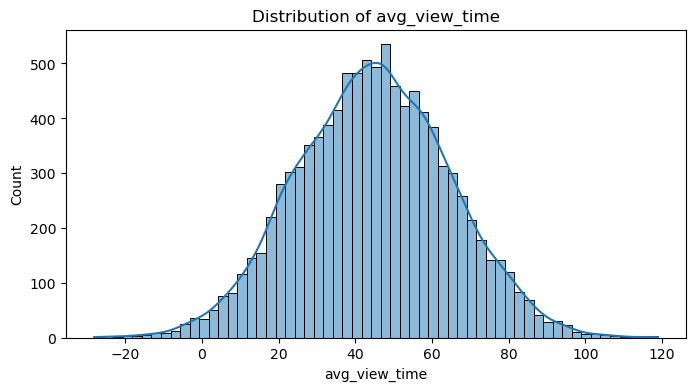

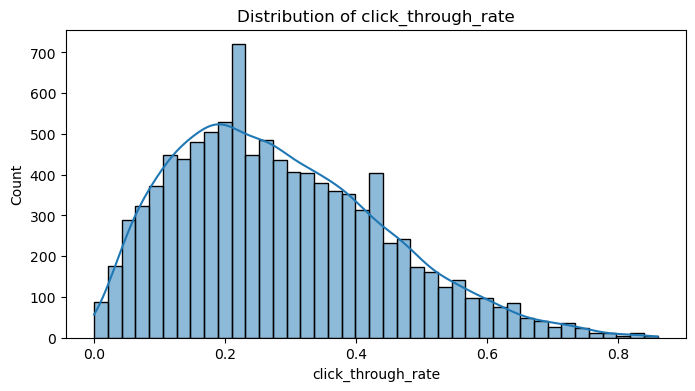

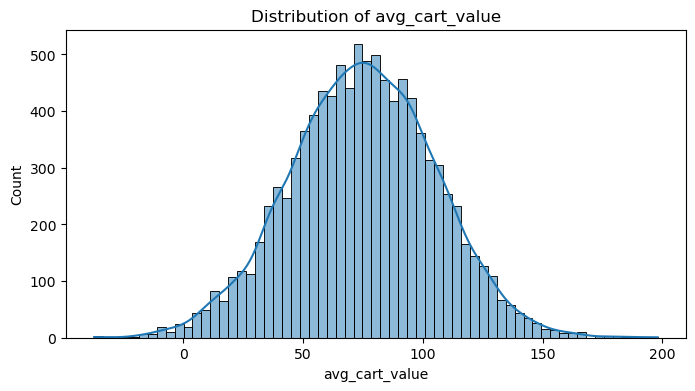

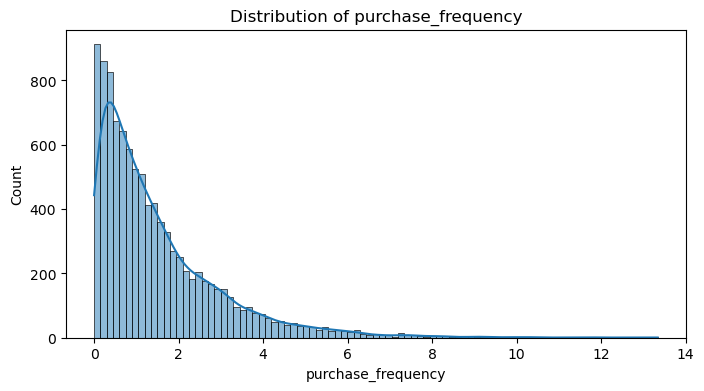

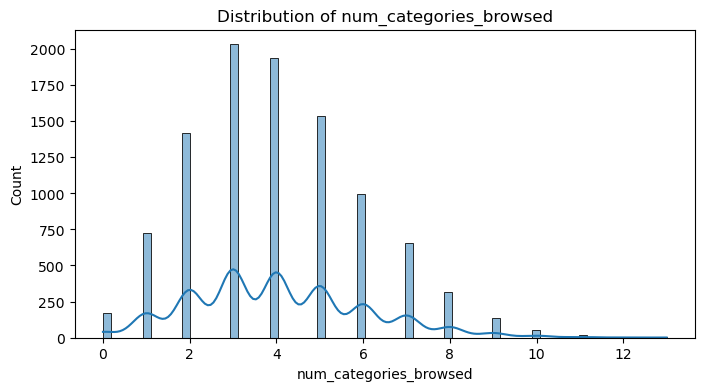

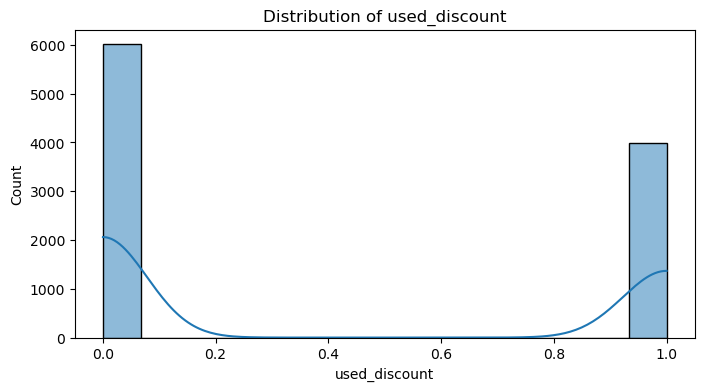

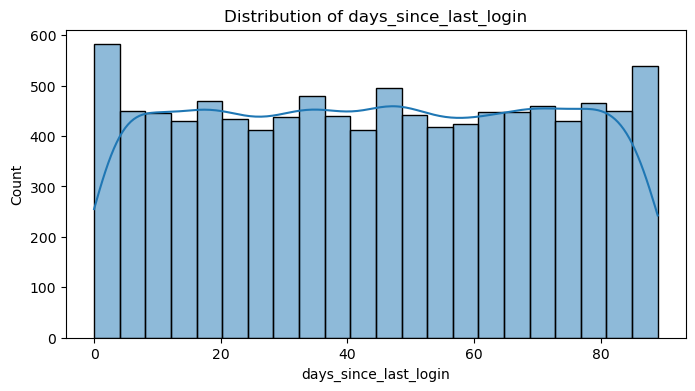

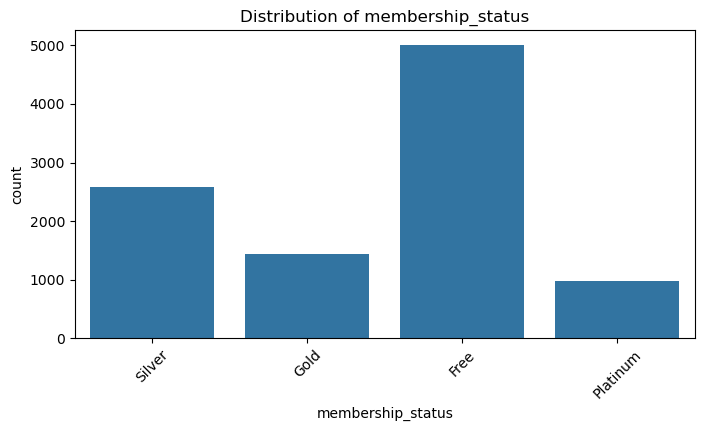

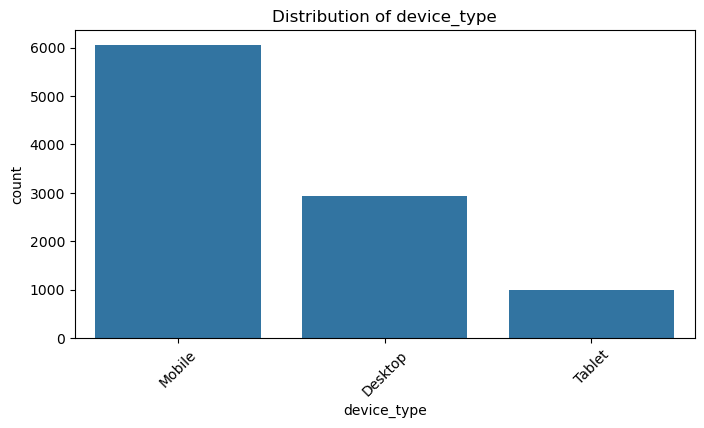

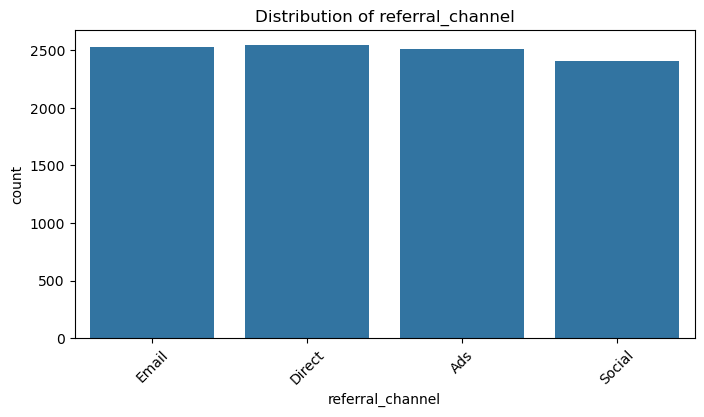

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include='object').drop(['user_id'], axis=1).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


## 📉 Step 4: Bivariate Analysis

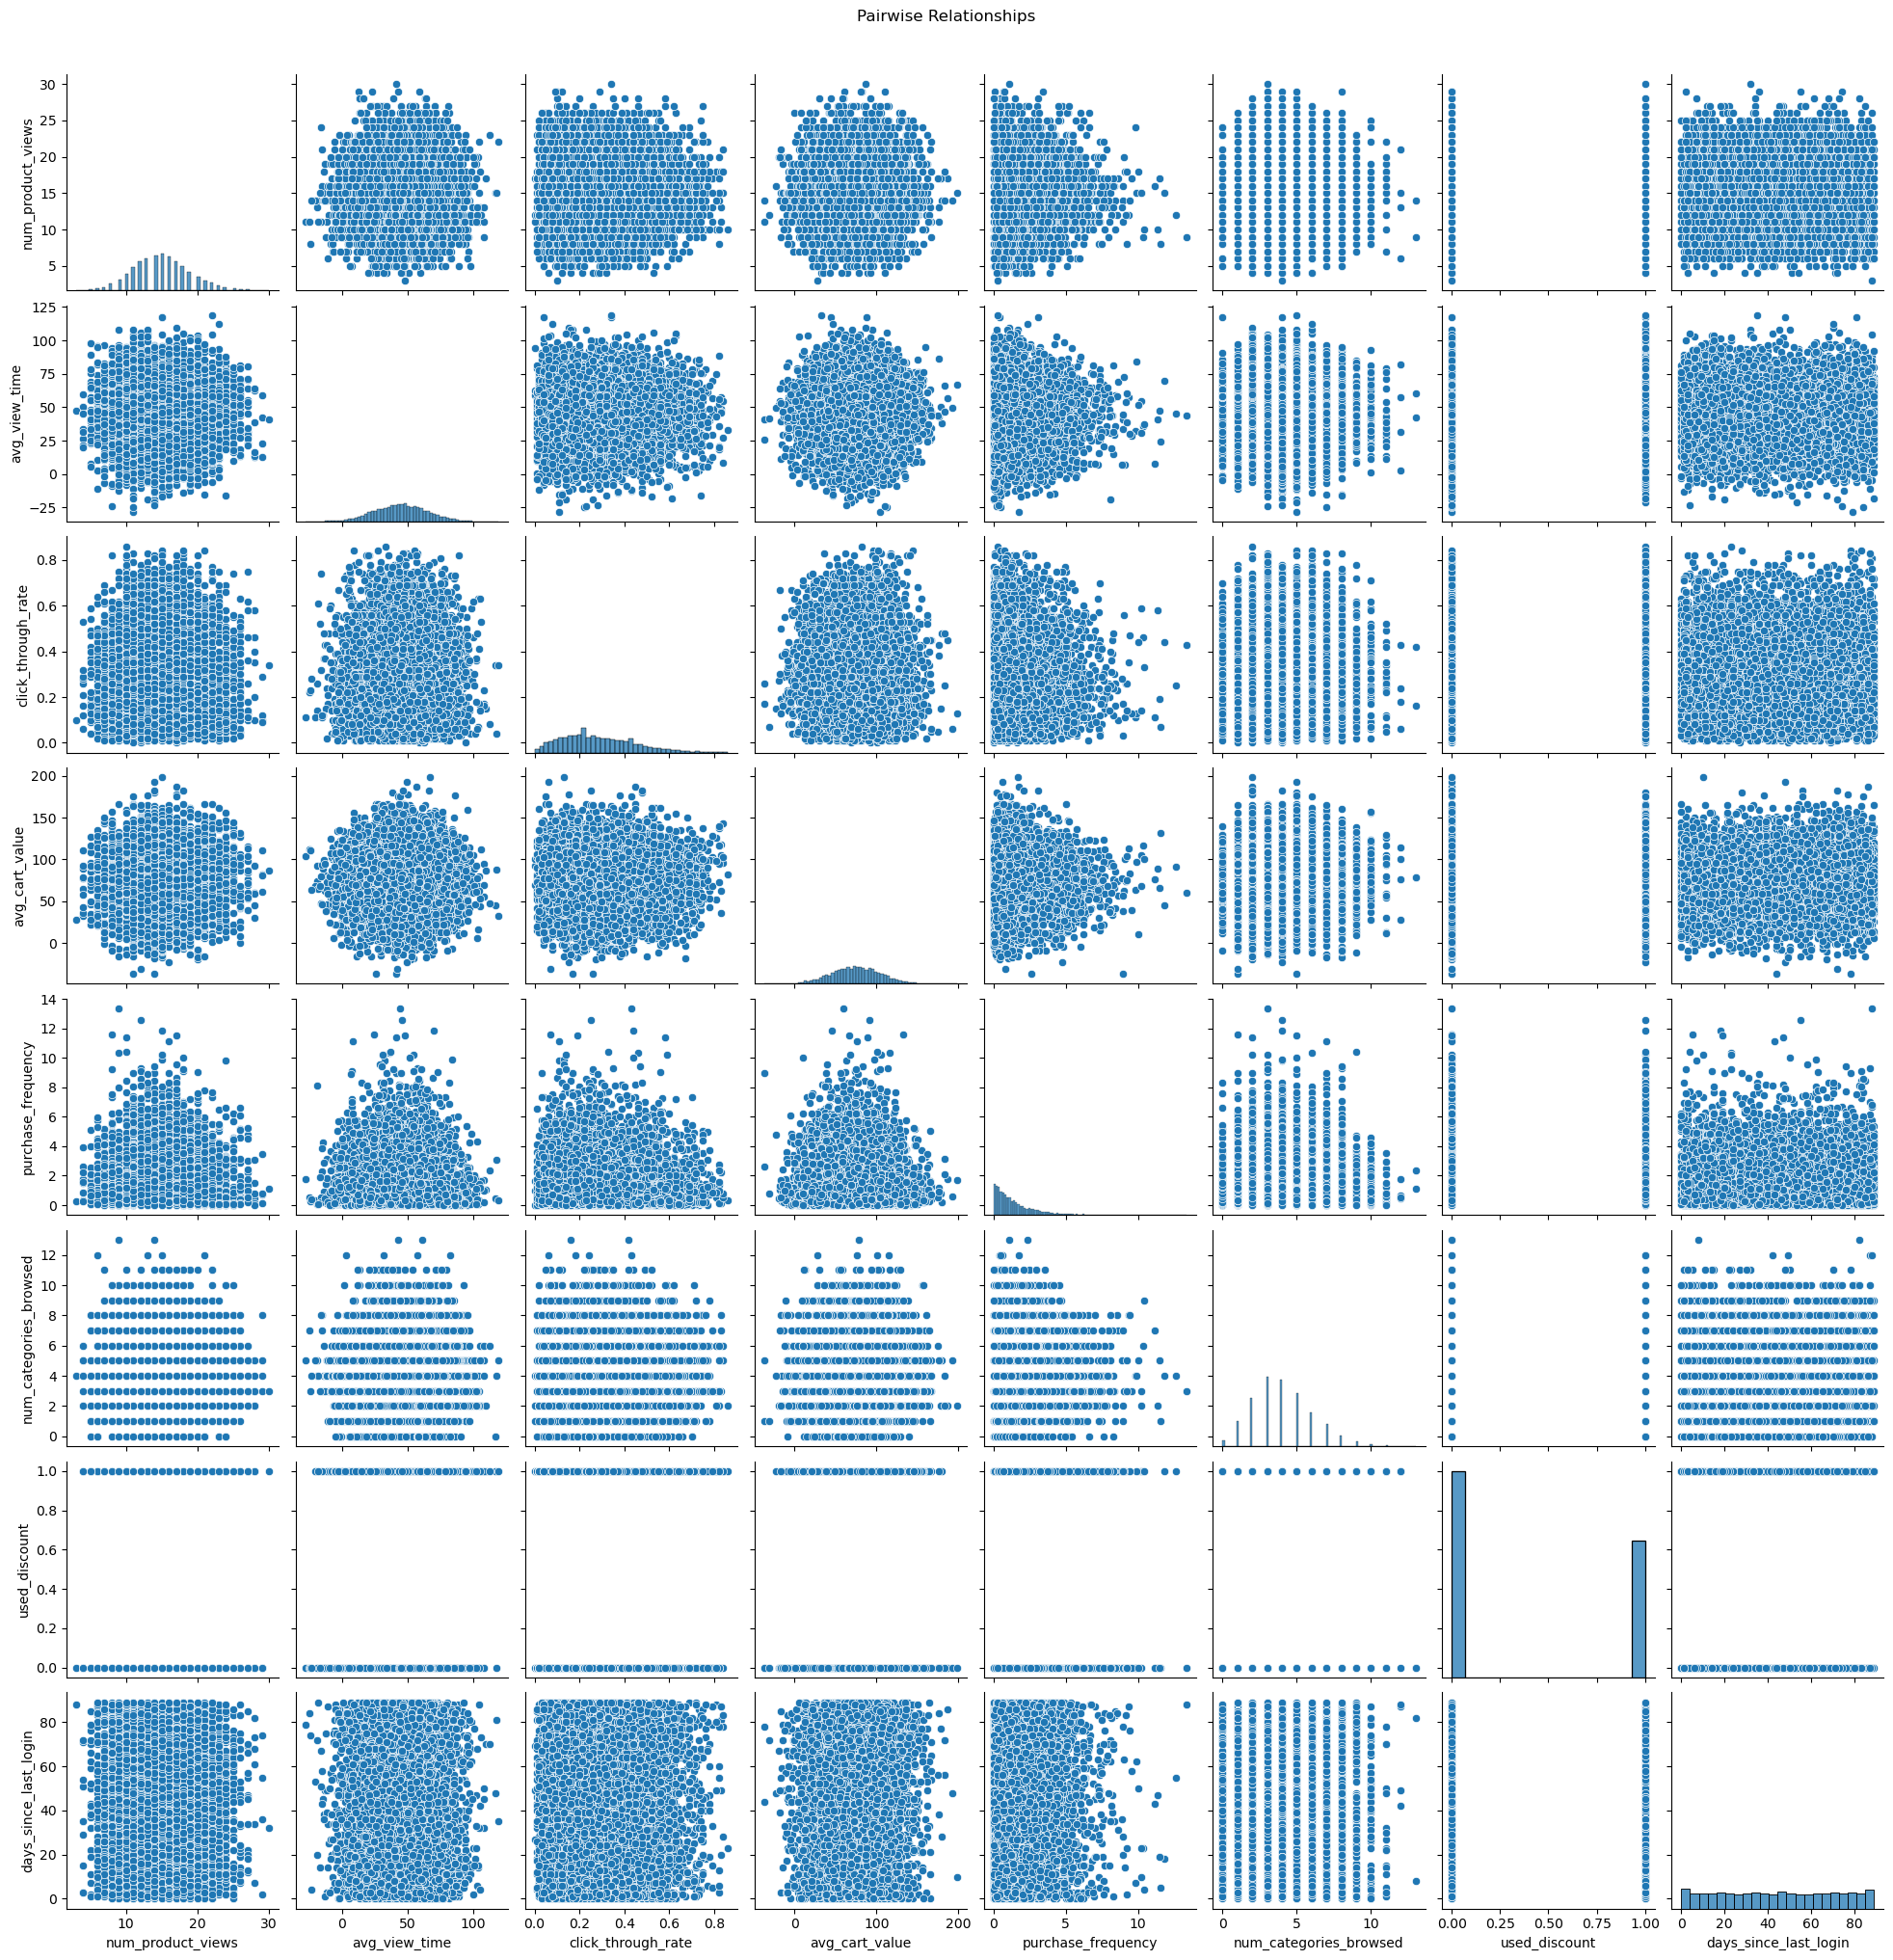

In [4]:

sns.pairplot(df[numerical_cols])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


## 📊 Step 5: Multivariate Analysis

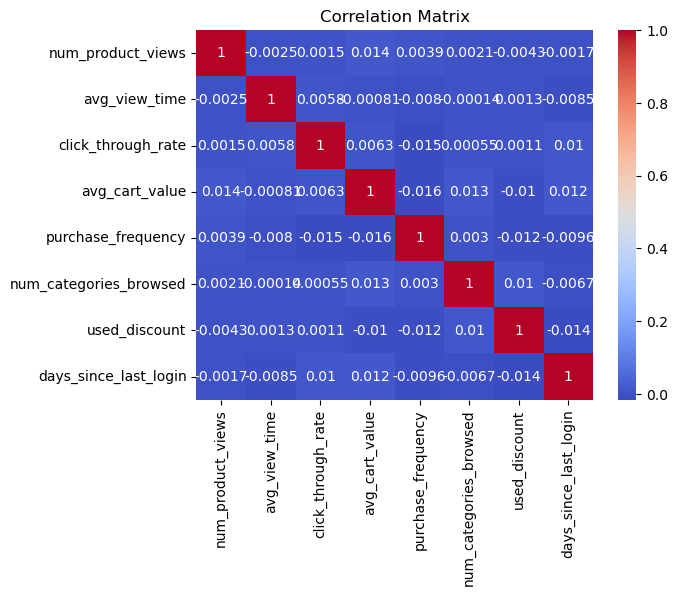

In [5]:

sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


## ❓ Step 6: Missing Value Analysis

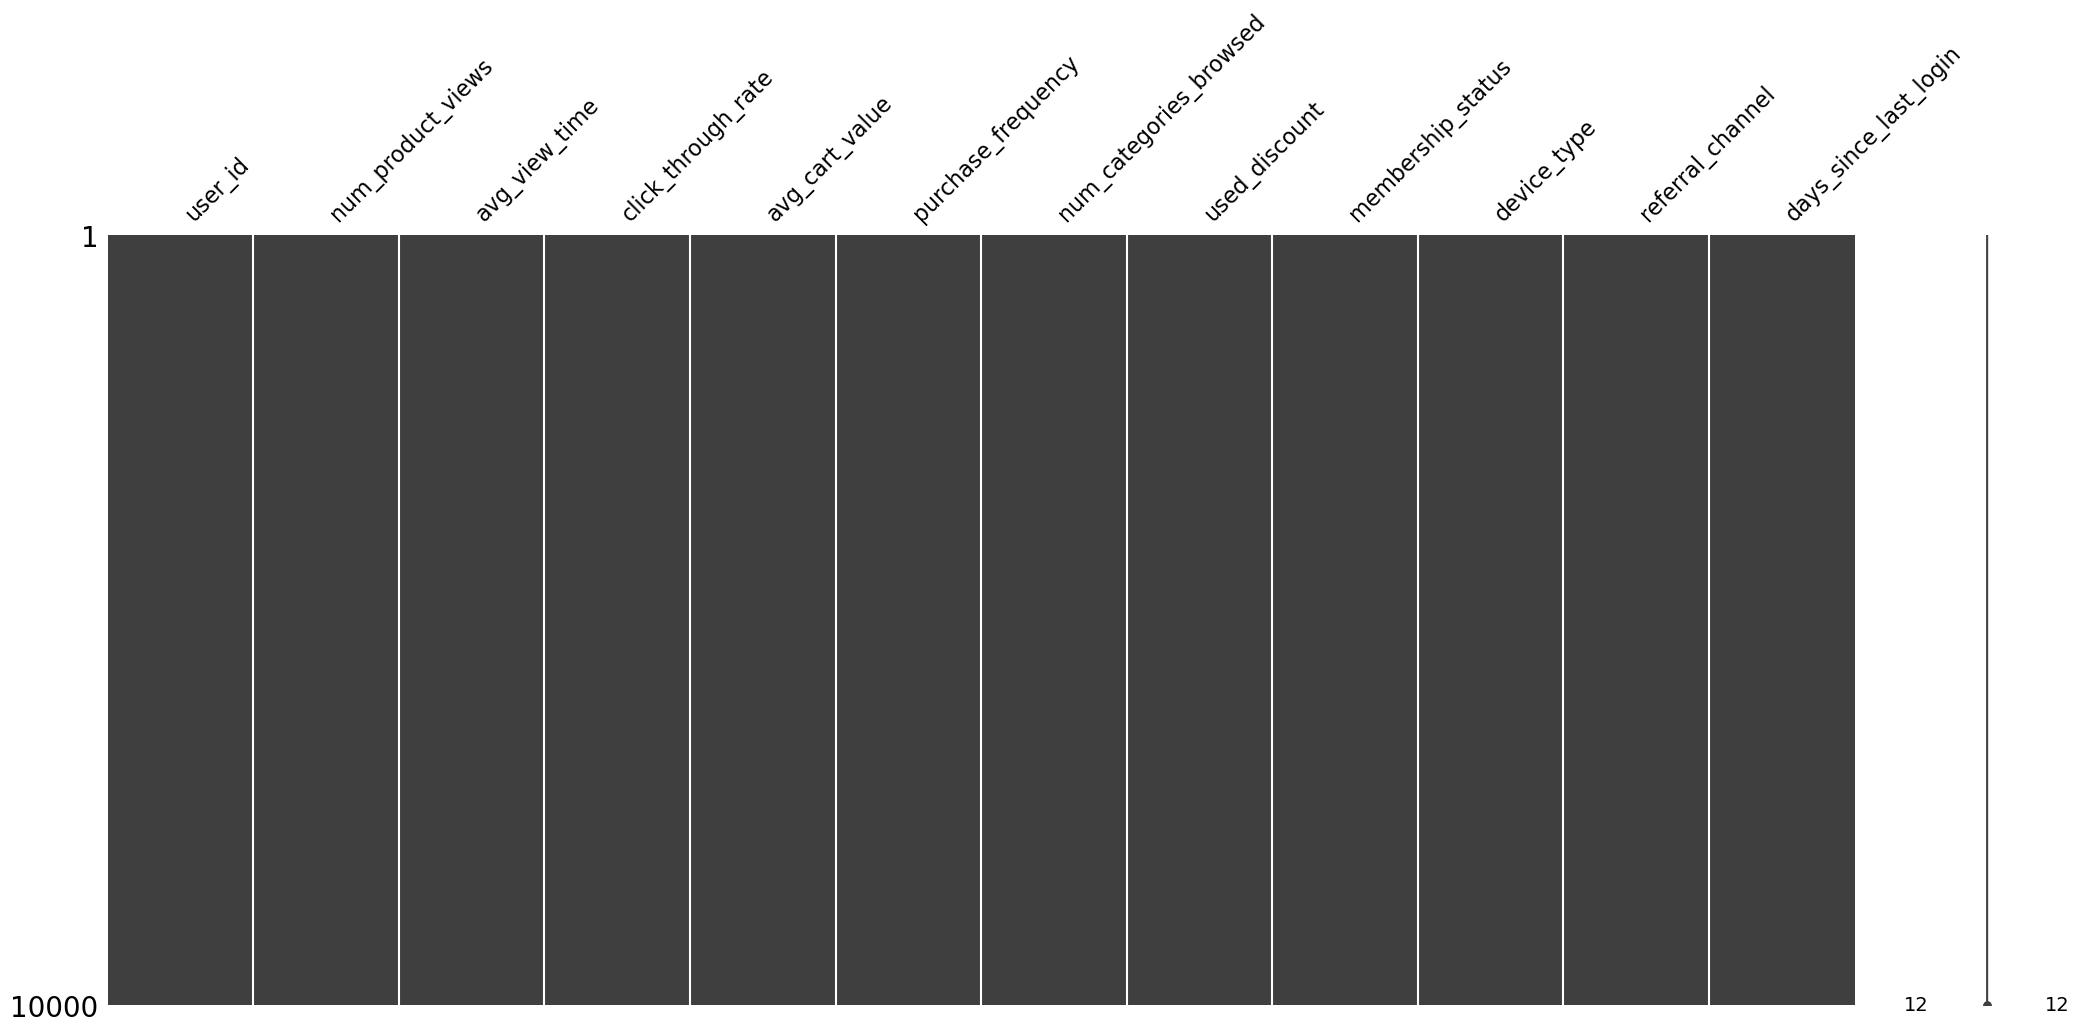

In [6]:

import missingno as msno
msno.matrix(df)
plt.show()


## 🚨 Step 7: Outlier Detection

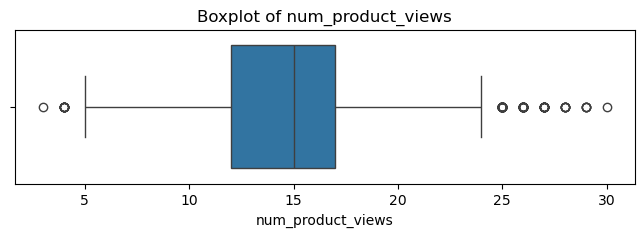

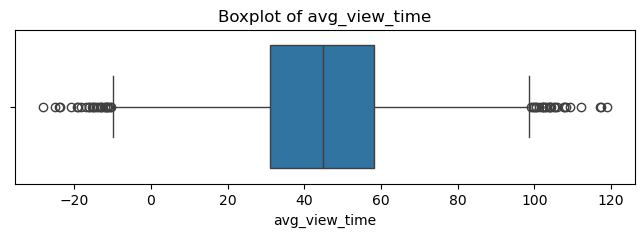

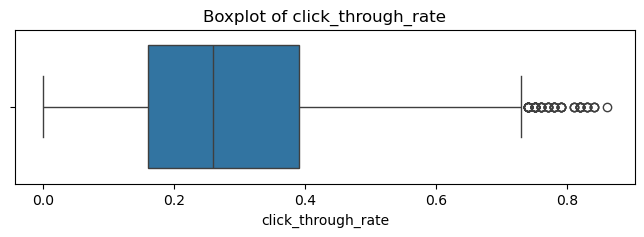

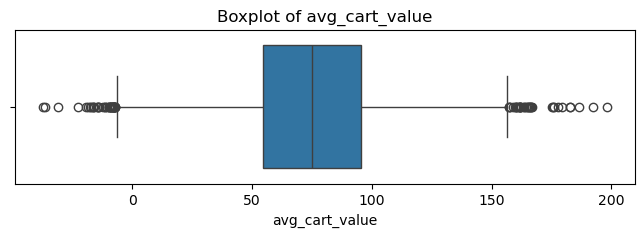

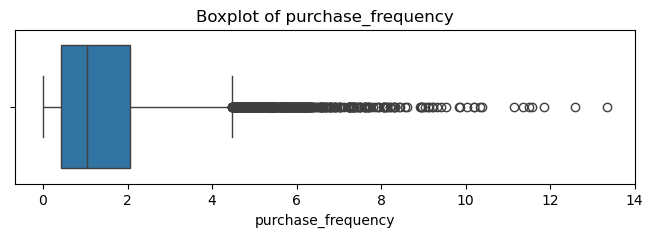

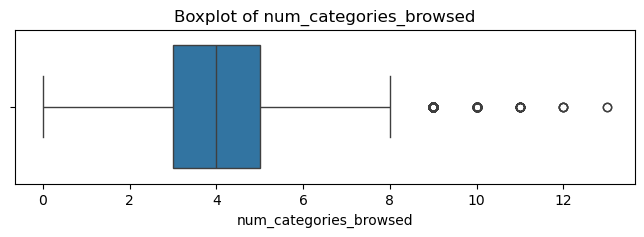

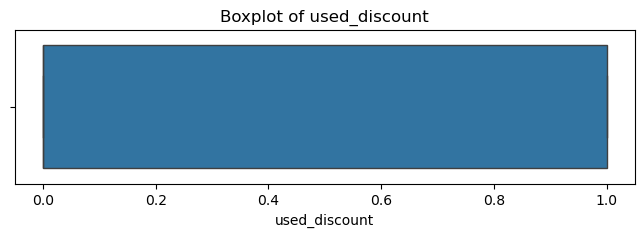

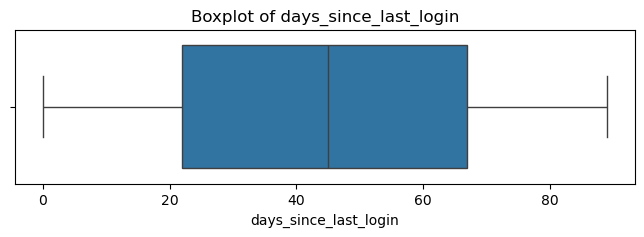

In [7]:

for col in numerical_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


## 🔄 Step 8: Skewness & Transformation

In [8]:

from scipy.stats import skew
import numpy as np

skew_vals = df[numerical_cols].apply(lambda x: skew(x.dropna()))
print(skew_vals)

for col in skew_vals[skew_vals > 1].index:
    df[f'{col}_log'] = np.log1p(df[col])


num_product_views         0.232239
avg_view_time             0.005699
click_through_rate        0.610893
avg_cart_value           -0.016108
purchase_frequency        1.944006
num_categories_browsed    0.494771
used_discount             0.412504
days_since_last_login    -0.000241
dtype: float64


## 🎯 Step 9: PCA Visualization

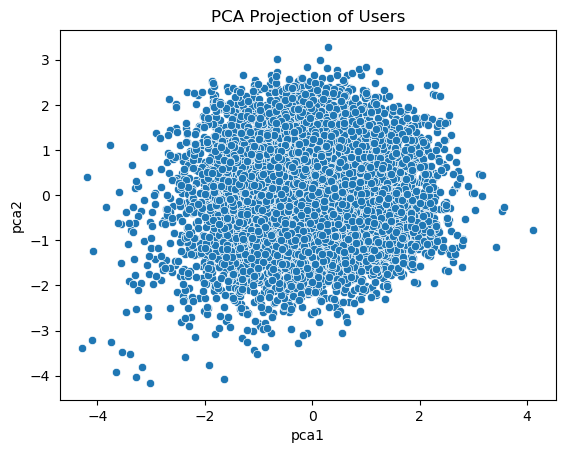

In [9]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaled = StandardScaler().fit_transform(df[numerical_cols])
pca = PCA(n_components=2).fit_transform(scaled)
df['pca1'], df['pca2'] = pca[:, 0], pca[:, 1]

sns.scatterplot(x='pca1', y='pca2', data=df)
plt.title("PCA Projection of Users")
plt.show()


## 🔍 Step 10: KMeans Clustering

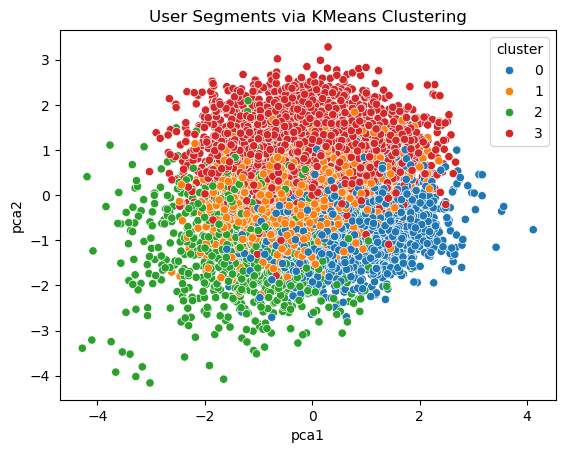

In [10]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled)

sns.scatterplot(x='pca1', y='pca2', hue='cluster', palette='tab10', data=df)
plt.title("User Segments via KMeans Clustering")
plt.show()


## 🛠️ Step 11: Feature Engineering Hints

In [11]:

df['activity_score'] = df['num_product_views'] * df['click_through_rate']
df['value_score'] = df['avg_cart_value'] * df['purchase_frequency']
df[['activity_score', 'value_score']].describe()


,activity_score,value_score
count,10000.000000,10000.000000
mean,4.257354,110.460313
std,2.694851,123.730360
min,0.000000,-332.403000
25%,2.217500,26.837800
50%,3.740000,69.642300
75%,5.780000,149.650225
max,20.250000,1529.718000


## 🧼 Step 12: Data Quality Check

In [12]:

print("Duplicates:", df.duplicated().sum())
zero_var = [col for col in df.columns if df[col].nunique() <= 1]
print("Zero-variance Columns:", zero_var)


Duplicates: 0
Zero-variance Columns: []


## ⏱️ Step 13: Time Profiling Placeholder

In [13]:

print("No time-based fields in this scenario.")


No time-based fields in this scenario.


## 🧩 Step 14: Multicollinearity (VIF)

In [14]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[numerical_cols].dropna()
X = add_constant(X)
pd.DataFrame({
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    "Feature": X.columns
})


,VIF,Feature
0,38.900128,const
1,1.000258,num_product_views
2,1.000179,avg_view_time
3,1.000386,click_through_rate
4,1.000921,avg_cart_value
5,1.000793,purchase_frequency
6,1.000332,num_categories_browsed
7,1.000564,used_discount
8,1.000635,days_since_last_login


## 🔁 Step 15: Interaction Effects

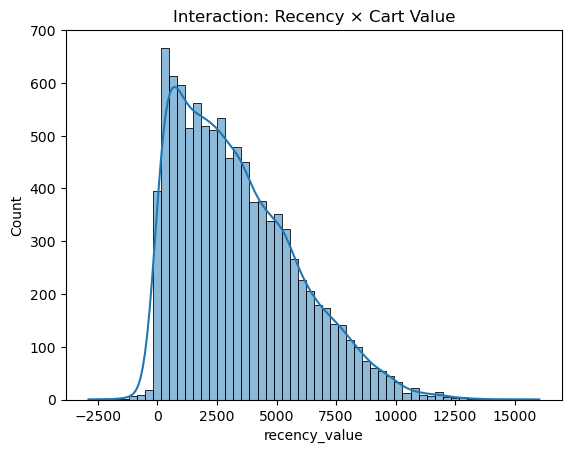

In [15]:

df['recency_value'] = df['days_since_last_login'] * df['avg_cart_value']
sns.histplot(df['recency_value'], kde=True)
plt.title("Interaction: Recency × Cart Value")
plt.show()


## 🧯 Step 16: Data Leakage Check

In [16]:

print("Unsupervised problem: No target leakage.")


Unsupervised problem: No target leakage.


## ⚖️ Step 17: Cluster Distribution

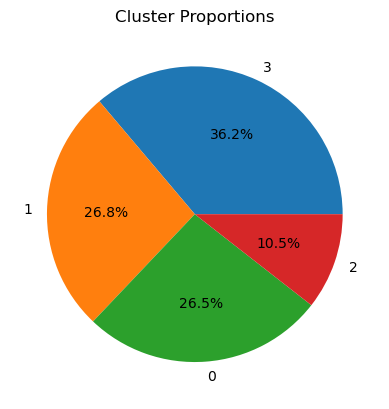

In [17]:

df['cluster'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title("Cluster Proportions")
plt.ylabel("")
plt.show()


## 🔢 Step 18: Cardinality Check

In [18]:

df[categorical_cols].nunique()


membership_status    4
device_type          3
referral_channel     4
dtype: int64

## 📈 Step 19: Cluster Summary Stats

In [19]:

df.groupby('cluster')[numerical_cols].mean().T


cluster,0,1,2,3
num_product_views,14.910667,15.085607,15.223697,14.957147
avg_view_time,43.544938,46.195361,43.672739,44.837846
click_through_rate,0.283166,0.285275,0.279412,0.283970
avg_cart_value,75.504504,75.727174,72.377043,74.894642
purchase_frequency,1.073268,1.110011,4.755166,1.102535
num_categories_browsed,3.958914,4.037383,4.075829,4.044236
used_discount,0.000000,0.000000,0.353555,1.000000
days_since_last_login,67.447795,21.903178,44.551659,44.101465


## 🤖 Step 20: AutoEDA Tools

In [20]:

# !pip install ydata-profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Product Cluster AutoEDA", explorative=True)
profile.to_file("autoeda_product_cluster.html")


/Users/anirudhyadav/anaconda3/envs/agentic_ai_rag/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Summarize dataset:  81%|████████  | 21/26 [00:00<00:00, 33.11it/s, Calculate auto correlation]      /Users/anirudhyadav/anaconda3/envs/agentic_ai_rag/lib/python3.10/site-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[9 9 9 ... 0 0 9]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 108.85it/s]


## 📐 Step 21: Statistical EDA

In [21]:

from scipy.stats import f_oneway

for col in numerical_cols:
    groups = [group[col].values for name, group in df.groupby('cluster')]
    stat, p = f_oneway(*groups)
    print(f"ANOVA for {col}: p = {p:.4f}")


ANOVA for num_product_views: p = 0.0833
ANOVA for avg_view_time: p = 0.0000
ANOVA for click_through_rate: p = 0.7849
ANOVA for avg_cart_value: p = 0.0159
ANOVA for purchase_frequency: p = 0.0000
ANOVA for num_categories_browsed: p = 0.2616
ANOVA for used_discount: p = 0.0000
ANOVA for days_since_last_login: p = 0.0000
